In [52]:
import datetime
from qiskit_finance.data_providers import RandomDataProvider
import numpy as np

from qiskit.circuit.library import PauliEvolutionGate
from qiskit.opflow import X, Y, Z, I
from qiskit import QuantumCircuit

from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, QAOA, SamplingVQE
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.result import QuasiDistribution
from qiskit_aer.primitives import Sampler
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
import matplotlib.pyplot as plt
from qiskit.circuit import Parameter

import networkx as nx

In [ ]:
QAOA()

# graph

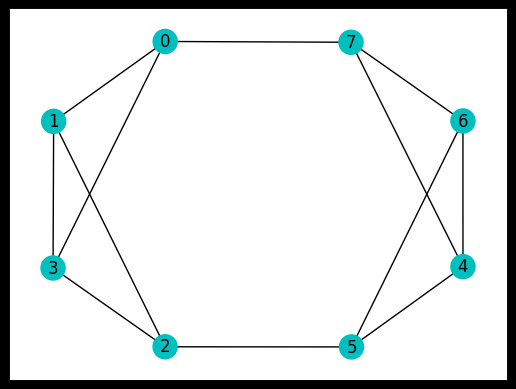

In [62]:
# a graph instance
# each node is connected to three nodes
# for example, node 0 is connected to nodes 1,7,3
example_graph_dict = {
    0: {1: {"weight": 1.0}, 7: {"weight": 1.0}, 3: {"weight": 1.0}},
    1: {0: {"weight": 1.0}, 2: {"weight": 1.0}, 3: {"weight": 1.0}},
    2: {1: {"weight": 1.0}, 3: {"weight": 1.0}, 5: {"weight": 1.0}},
    3: {1: {"weight": 1.0}, 2: {"weight": 1.0}, 0: {"weight": 1.0}},
    4: {7: {"weight": 1.0}, 6: {"weight": 1.0}, 5: {"weight": 1.0}},
    5: {6: {"weight": 1.0}, 4: {"weight": 1.0}, 2: {"weight": 1.0}},
    6: {7: {"weight": 1.0}, 4: {"weight": 1.0}, 5: {"weight": 1.0}},
    7: {4: {"weight": 1.0}, 6: {"weight": 1.0}, 0: {"weight": 1.0}},
}
pos = nx.spring_layout(nx.to_networkx_graph(example_graph_dict))
colors = ["c" for key in example_graph_dict.items()]

# convert to a NetworkX graph
example_graph = nx.to_networkx_graph(example_graph_dict)
nx.draw_networkx(example_graph, with_labels=True, node_color=colors, pos=pos)
ax = plt.gca()
ax.set_facecolor("w")

In [73]:
for edges in example_graph.edges:
    print(edges[0])

0
0
0
1
1
2
2
4
4
4
5
6


# a standard QAOA

In [78]:
def ansatz(graph, n_layers, params, mixer="standard"):
    n_qubits = len(graph)
    len(example_graph_dict)
    qc = QuantumCircuit(n_qubits)
    for j in range(n_layers):
        # cost terms
        for edges in graph.edges:
            qc.rzz(params[2 * j], edges[0], edges[1])

        # mixer terms
        if mixer == "standard":
            for i in range(n_qubits):
                qc.rx(params[2 * j + 1], i)

        elif mixer == '2':
            pass
    return qc

In [ ]:
def cost_str(str):
    index = 0
    for i in str:
        if 

In [ ]:
def cost(graph, counts):
    

# Mixers

In [ ]:
def QAOA_mixer(nqubits, n_layers, mixer="standard", gap=5):
    beta = Parameter("$\\beta$")
    c = QuantumCircuit(nqubits)


    if len(params) != nqubits:
        raise ValueError("the number of parammeters doesn't match with the number of qubits")
    
    for j in range(n_layers):
        # standard mixer term
        if mixer == "standard":
            for i in range(nqubits):
                c.rx(i, theta=params[2 * j + 1])

        # XY mixer
        elif mixer == "ring":
            for i in range(nqubits - 1):
                c.rxx(params[2 * j + 1], i, i+1)
                c.ryy(params[2 * j + 1], i, i+1)
            c.rxx(params[2 * j + 1], nqubits - 1, 0)
            c.ryy(params[2 * j + 1], nqubits - 1, 0)

        # parity ring mixer
        elif mixer == "par_ring":
            half = int(np.floor(nqubits / 2))
            if 2 * half < nqubits:
                end = half
            else:
                end = half - 1
            for i in range(half):  # even
                c.exp1(2 * i, 2 * i + 1, unitary=tc.gates._xx_matrix, theta=params[2 * j + 1])
                c.exp1(2 * i, 2 * i + 1, unitary=tc.gates._yy_matrix, theta=params[2 * j + 1])
            for i in range(end):  # odd
                c.exp1(2 * i + 1, 2 * i + 2, unitary=tc.gates._xx_matrix, theta=params[2 * j + 1])
                c.exp1(2 * i + 1, 2 * i + 2, unitary=tc.gates._yy_matrix, theta=params[2 * j + 1])

        # full mixer
        elif mixer == "full":
            for i in range(nqubits - gap):
                c.exp1(i, i + gap, unitary=tc.gates._xx_matrix, theta=params[2 * j + 1])
                c.exp1(i, i + gap, unitary=tc.gates._yy_matrix, theta=params[2 * j + 1])
            for i in range(gap):
                c.exp1(nqubits - gap - 1 + i, 1 + gap, unitary=tc.gates._xx_matrix, theta=params[2 * j + 1])
                c.exp1(nqubits - gap - 1 + i, 1 + gap, unitary=tc.gates._yy_matrix, theta=params[2 * j + 1])
        #
        elif mixer == "QAMPA":
            pass

        else:
            raise RuntimeError("Invalid mixer name")
    return c

mixer = QAOA_mixer(params, nqubits, nlayers, mixer="standard", gap=5):

## Trotterization

In [ ]:
operator = (X ^ X) + (Y ^ Y)
evo = PauliEvolutionGate(operator, time=0.2)
circuit = QuantumCircuit(2)
circuit.append(evo, range(2))
circuit.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  exp(-it (XX + YY))(0.2) │
q_1: ┤1                         ├
     └──────────────────────────┘